### Churn Prediction

In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

df = pd.read_csv('../data/processed/telco-customer-churn.csv')

#### Análise Exploratória (EDA)

##### Visualizando dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Colunas do dataset

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Dimensões do dataset

In [5]:
df.shape

(7043, 21)

##### Tipos de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Estatísticas descritivas (Variáveis numéricase categoricas)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


##### Verificar quantos clientes saíram e quantos permaneceram

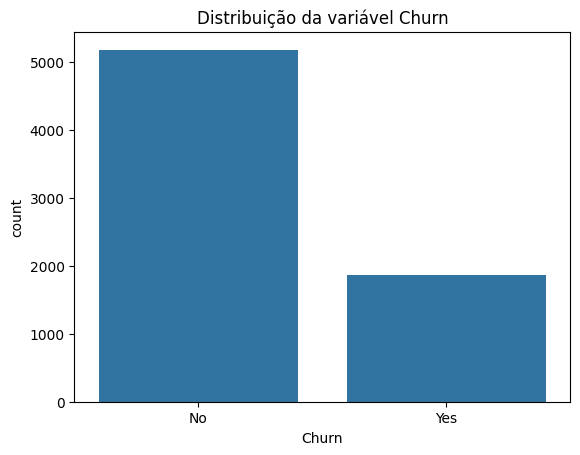

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Distribuição da variável Churn")
plt.show()

##### Convertendo todas as variáveis categóricas em variáveis numéricas

In [ ]:
def convert_categorical_number(df):

    df_filter = df.copy()
    
    #Desconsiderando coluna id
    df_filter = df_filter[df_filter.columns[1:]]
    
    #Filtrando apenas as colunas do tipo "object"
    columns_object = df_filter.select_dtypes(include=("object")).columns

    for col in columns_object:
        #Criando dicionário com as variáveis categóricas
        _dict = { v: k for k, v in pd.DataFrame(df[col].unique()).to_dict()[0].items()}
        df_filter[col] = df_filter[col].map(_dict)

    return df_filter

df_numerical = convert_categorical_number(df)
df_numerical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4,1


##### Calculando a correlação entre as variáveis

In [ ]:
df_numerical.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.014569,-0.012302,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.220173,0.023880,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.096848,-0.042628,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.113890,0.006300,-0.164221
tenure,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,-0.253743,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.247900,0.100469,-0.352229
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,0.247398,-0.029806,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.490700,0.015373,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.323260,-0.038247,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.621227,-0.026788,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.253743,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.710477,-0.054537,-0.074205
